In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import lsst.daf.butler as dafButler


In [2]:
### at data-int, can use this:
#repo = 's3://butler-us-central1-panda-dev/dc2/butler-external.yaml'
repo = 'dp02'
butler = dafButler.Butler(repo, collections='2.2i/runs/DP0.2')
registry = butler.registry

In [3]:
# To see what dataset types are (potentially) available:
dstypes = []
dsnames = []
for x in registry.queryDatasetTypes():
    # print(x)
    dstypes.append(x)
    dsnames.append(x.name)

In [4]:
# Extract the names of validate_drp metrics:
metricnames = []
metricnames_full = []
for name in dsnames:
    if 'metricvalue_validate_drp' in name:
        metricnames.append(str.split(name, 'metricvalue_validate_drp_')[1])
        metricnames_full.append(name)

In [5]:
metricnames_full

['metricvalue_validate_drp_AB1',
 'metricvalue_validate_drp_AF3_design',
 'metricvalue_validate_drp_AD1_design',
 'metricvalue_validate_drp_AF1_design',
 'metricvalue_validate_drp_AD2_design',
 'metricvalue_validate_drp_AF2_design',
 'metricvalue_validate_drp_AM2',
 'metricvalue_validate_drp_PA1',
 'metricvalue_validate_drp_AM1',
 'metricvalue_validate_drp_AD3_design',
 'metricvalue_validate_drp_PF1_design_gri',
 'metricvalue_validate_drp_AM3',
 'metricvalue_validate_drp_modelPhotRepStar1',
 'metricvalue_validate_drp_modelPhotRepGal1',
 'metricvalue_validate_drp_psfPhotRepStar1',
 'metricvalue_validate_drp_psfPhotRepStar3',
 'metricvalue_validate_drp_psfPhotRepStar2',
 'metricvalue_validate_drp_modelPhotRepStar4',
 'metricvalue_validate_drp_psfPhotRepStar4',
 'metricvalue_validate_drp_modelPhotRepGal2',
 'metricvalue_validate_drp_modelPhotRepGal4',
 'metricvalue_validate_drp_modelPhotRepStar2',
 'metricvalue_validate_drp_modelPhotRepStar3',
 'metricvalue_validate_drp_modelPhotRepGal3',

In [6]:
pa1_query = registry.queryDatasets(datasetType='metricvalue_validate_drp_PA1')
am1_query = registry.queryDatasets(datasetType='metricvalue_validate_drp_AM1')
te1_query = registry.queryDatasets(datasetType='metricvalue_validate_drp_TE1')


In [7]:
te1_query.count()

942

In [8]:
i=0

for ref in pa1_query:
    if i>0:
        break
    ppp1 = butler.get(ref)
    print(ppp1)
    i += 1

PA1: 4.386318562976413 mmag


In [9]:
pa1_refs = []
pa1_measurements = []
pa1_tracts = []
pa1_bands = []
pa1_units = []

i=0

for ref in tqdm(pa1_query):
    #if i>100:
    #    break
    pa1_refs.append(ref)
    pa1_tmp = butler.get(ref)
    pa1_measurements.append(pa1_tmp.quantity.value)
    pa1_units.append(pa1_tmp.quantity.unit)
    pa1_tracts.append(ref.dataId['tract'])
    pa1_bands.append(ref.dataId['band'])
    i += 1



942it [10:02,  1.56it/s]


In [10]:
#print(pa1_bands)

In [11]:
am1_refs = []
am1_measurements = []
am1_tracts = []
am1_bands = []
am1_units = []

i = 0

for ref in tqdm(am1_query):
    #if i>100:
    #    break
    am1_refs.append(ref)
    am1_tmp = butler.get(ref)
    am1_measurements.append(am1_tmp.quantity.value)
    am1_units.append(am1_tmp.quantity.unit)
    am1_tracts.append(ref.dataId['tract'])
    am1_bands.append(ref.dataId['band'])
    i += 1


942it [10:05,  1.56it/s]


In [12]:
te1_refs = []
te1_measurements = []
te1_tracts = []
te1_bands = []
te1_units = []
i = 0

for ref in tqdm(te1_query):
    #if i>100:
    #    break
    te1_refs.append(ref)
    te1_tmp = butler.get(ref)
    te1_measurements.append(te1_tmp.quantity.value)
    te1_units.append(te1_tmp.quantity.unit)
    te1_tracts.append(ref.dataId['tract'])
    te1_bands.append(ref.dataId['band'])
    i += 1


942it [04:13,  3.72it/s]


In [13]:
pa1_measurements = np.array(pa1_measurements)
am1_measurements = np.array(am1_measurements)
te1_measurements = np.array(te1_measurements)

pa1_bands = np.array(pa1_bands)
am1_bands = np.array(am1_bands)
te1_bands = np.array(te1_bands)

pa1_tracts = np.array(pa1_tracts)
am1_tracts = np.array(am1_tracts)
te1_tracts = np.array(te1_tracts)

pa1_units = np.array(pa1_units)
am1_units = np.array(am1_units)
te1_units = np.array(te1_units)


In [35]:
pa1_units[0]

Unit("mmag")

In [36]:
from astropy.table import Table

pa1_tab = Table([pa1_tracts, pa1_measurements, pa1_bands], names=['tract','meas','band'])
am1_tab = Table([am1_tracts, am1_measurements, am1_bands], names=['tract','meas','band'])
te1_tab = Table([te1_tracts, te1_measurements, te1_bands], names=['tract','meas','band'])

am1_tab

tract,meas,band
int64,float64,str1
3086,10.424945544084377,u
3454,11.144293991457936,z
3454,15.050166581391162,y
3454,10.999190376616895,i
3454,11.855556499433218,g
3631,9.73038308403602,u
3454,10.79034518909972,u
3631,14.29960469358035,g
4022,13.061314997369918,g


In [37]:
pa1_tab.write('pa1_dp02.fits')
am1_tab.write('am1_dp02.fits')
te1_tab.write('te1_dp02.fits')


In [62]:
params = {
    'axes.labelsize': 14,
    'font.size': 14,
    'legend.fontsize': 12,
    #'xtick.major.width': 3,
    #'xtick.minor.width': 2,
    #'xtick.major.size': 12,
    #'xtick.minor.size': 6,
    'xtick.direction': 'in',
    'xtick.top': True,
    #'lines.linewidth': 2,
    #'axes.linewidth': 2,
    #'axes.labelweight': 2,
    #'axes.titleweight': 2,
    #'ytick.major.width': 3,
    #'ytick.minor.width': 2,
    #'ytick.major.size': 12,
    #'ytick.minor.size': 6,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.figsize': [10, 7],
    'figure.facecolor': 'White'
    }

plt.rcParams.update(params)


In [15]:
pa1_refs[0].dataId['tract']
pa1_refs[0].dimensions

DimensionGraph({band, instrument, skymap, tract})

In [16]:
# coadd = butler.get('deepCoadd_calexp', dataId=pa1_refs[0].dataId)

In [17]:
from descolors import BAND_COLORS
for name,color in BAND_COLORS.items():
    print("%s : %s"%(name,color))

u : #56b4e9
g : #008060
r : #ff4000
i : #850000
z : #6600cc
Y : #000000


In [18]:
BAND_COLORS.get('u')

'#56b4e9'

In [19]:
#usel = (am1_bands == bands[0])
#print(usel)
#print(am1_bands, te1_bands)
# pa1_bands

In [20]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']
bands_blue = ['g', 'r', 'i']
bands_red = ['u', 'z', 'y']

In [53]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

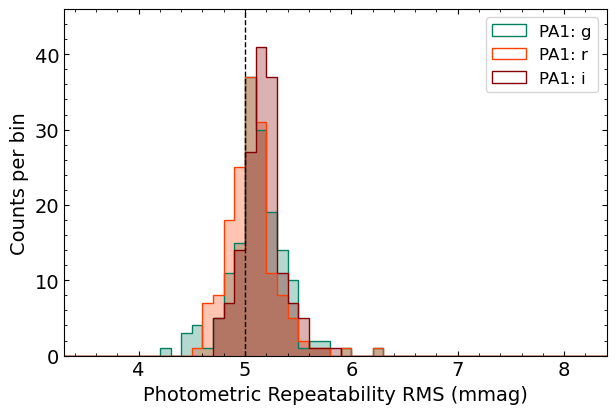

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))

plt.subplot(1, 1, 1)

for band in bands_blue:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(pa1_bands == band)
#    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), alpha=0.3,
             linewidth=1, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
             linewidth=1, color=BAND_COLORS.get(colorband), label='PA1: '+band)

plt.vlines(5.0, 0, 46, linewidth=1, linestyle='--', color='Black')    
plt.legend()
plt.xlim(3.3, 8.4)
plt.ylim(0, 46)
plt.xlabel('Photometric Repeatability RMS (mmag)')
#plt.xlabel(r'${\rm PA1 (mmag)}$')
plt.ylabel('Counts per bin')
#plt.ylabel(r'${\rm N}$')
plt.minorticks_on()

plt.savefig('dp02_pa1_alltracts_gri.png', dpi=300)

plt.show()

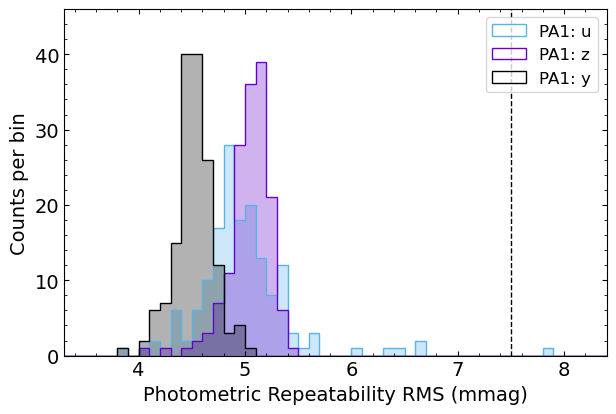

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))

plt.subplot(1, 1, 1)

for band in bands_red:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(pa1_bands == band)
#    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), alpha=0.3,
             linewidth=1, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
             linewidth=1, color=BAND_COLORS.get(colorband), label='PA1: '+band)

plt.vlines(7.5, 0, 46, linewidth=1, linestyle='--', color='Black')    
plt.legend()
plt.ylim(0, 46)
plt.xlim(3.3, 8.4)
plt.xlabel('Photometric Repeatability RMS (mmag)')
#plt.xlabel(r'${\rm PA1 (mmag)}$')
plt.ylabel('Counts per bin')
plt.minorticks_on()

plt.savefig('dp02_pa1_alltracts_uzy.png', dpi=300)

plt.show()

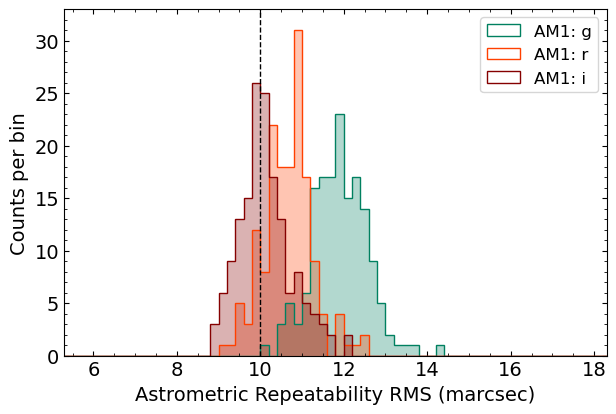

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))

plt.subplot(1, 1, 1)

for band in bands_blue:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(am1_bands == band)
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), alpha=0.3,
             linewidth=1, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), histtype='step',
             linewidth=1, color=BAND_COLORS.get(colorband), label='AM1: '+band)

plt.vlines(10.0, 0, 33, linewidth=1, linestyle='--', color='Black')    
plt.legend()
plt.ylim(0, 33)
plt.xlim(5.3, 18.3)
plt.xlabel('Astrometric Repeatability RMS (marcsec)')
plt.ylabel('Counts per bin')
plt.minorticks_on()

plt.savefig('dp02_am1_alltracts_gri.png', dpi=300)

plt.show()

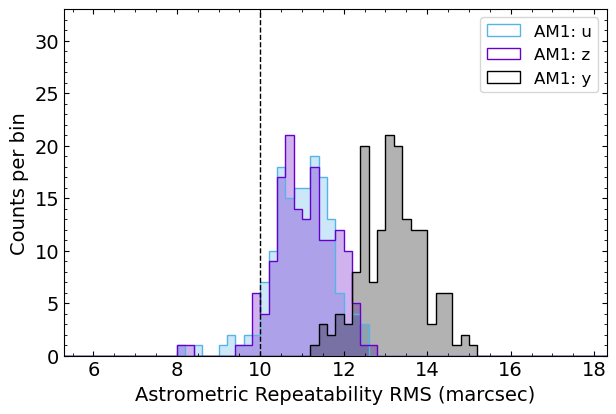

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))

plt.subplot(1, 1, 1)

for band in bands_red:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(am1_bands == band)
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), alpha=0.3,
             linewidth=1, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), histtype='step',
             linewidth=1, color=BAND_COLORS.get(colorband), label='AM1: '+band)

plt.vlines(10.0, 0, 33, linewidth=1, linestyle='--', color='Black')
plt.legend()
plt.ylim(0, 33)
plt.xlim(5.3, 18.3)
plt.xlabel('Astrometric Repeatability RMS (marcsec)')
plt.ylabel('Counts per bin')
plt.minorticks_on()

plt.savefig('dp02_am1_alltracts_uzy.png', dpi=300)

plt.show()

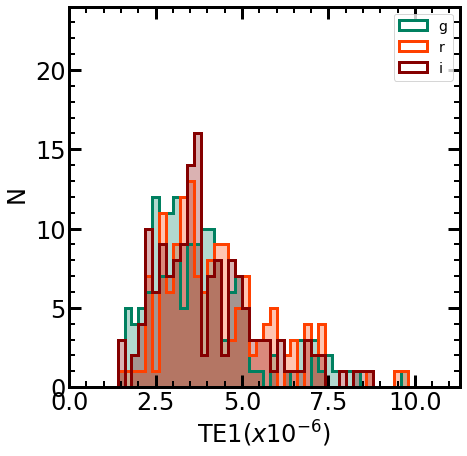

In [236]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), sharex=False, sharey=True)

plt.subplot(1, 1, 1)

for band in bands_blue:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(te1_bands == band)
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(20.0, 0, 24, linewidth=3, linestyle='--', color='Black')
plt.legend(loc='upper right')
plt.ylim(0, 24)
#plt.xlim(0.8, 44)
plt.xlim(0, 11.3)
#plt.xlim(0, 22.3)
plt.xlabel(r'${\rm TE1} (x10^{-6})$')
plt.ylabel(r'${\rm N}$')
plt.minorticks_on()
#plt.semilogx()

plt.savefig('dp02_te1_alltracts_gri.png', dpi=300)

plt.show()

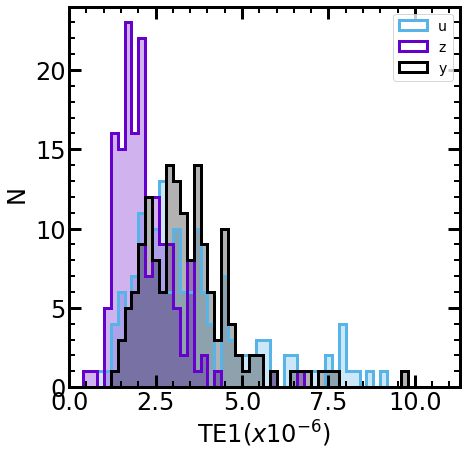

In [235]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), sharex=False, sharey=True)

plt.subplot(1, 1, 1)

for band in bands_red:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(te1_bands == band)
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(20.0, 0, 24, linewidth=3, linestyle='--', color='Black')
plt.legend(loc='upper right')
plt.ylim(0, 24)
plt.xlim(0, 11.3)
plt.xlabel(r'${\rm TE1} (x10^{-6})$')
plt.ylabel(r'${\rm N}$')
plt.minorticks_on()
#plt.semilogx()

plt.savefig('dp02_te1_alltracts_uzy.png', dpi=300)

plt.show()

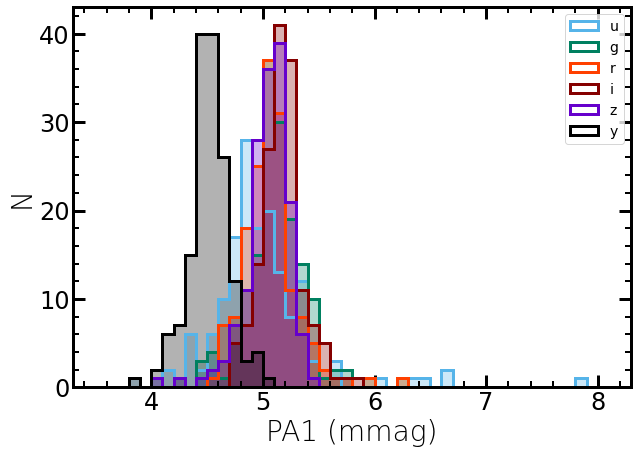

In [157]:
fig = plt.figure(figsize=(10, 7))

for band in bands:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(pa1_bands == band)
#    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)
plt.legend()
plt.xlim(3.3, 8.3)
plt.xlabel('PA1 (mmag)')
plt.ylabel('N')
plt.minorticks_on()

#plt.savefig('dp02_pa1_alltracts_allbands.png', dpi=300)
plt.show()

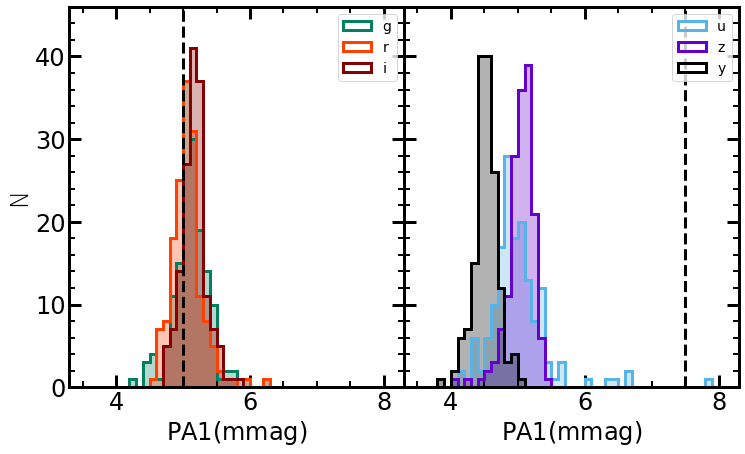

In [198]:
# fig = plt.figure(figsize=(14, 7))
fig, ax = plt.subplots(1, 2, figsize=(12, 7), sharex=False, sharey=True)
#fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.subplot(1, 2, 1)

for band in bands_blue:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(pa1_bands == band)
#    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(5.0, 0, 46, linewidth=3, linestyle='--', color='Black')    
plt.legend()
plt.xlim(3.3, 8.3)
plt.ylim(0, 46)
plt.xlabel('photometric repeatability RMS (mmag)')
#plt.xlabel(r'${\rm PA1 (mmag)}$')
plt.ylabel('counts per bin')
plt.minorticks_on()

plt.subplot(1, 2, 2)

for band in bands_red:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(pa1_bands == band)
#    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(pa1_measurements[sel], bins=np.arange(0, 11, 0.1), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(7.5, 0, 46, linewidth=3, linestyle='--', color='Black')    
plt.legend()
plt.xlim(3.3, 8.3)
plt.xlabel(r'${\rm PA1 (mmag)}$')
#plt.ylabel('N')
plt.minorticks_on()

# plt.savefig('dp02_pa1_alltracts_allbands_2panel.png', dpi=300)

plt.show()

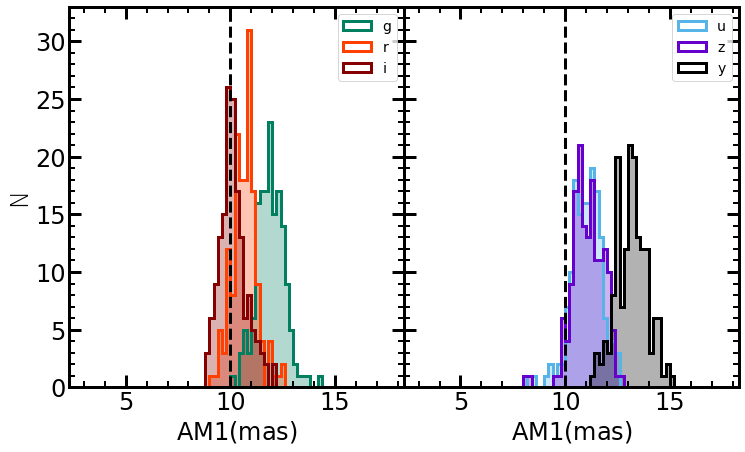

In [207]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7), sharex=False, sharey=True)
#fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.subplot(1, 2, 1)

for band in bands_blue:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(am1_bands == band)
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(10.0, 0, 33, linewidth=3, linestyle='--', color='Black')    
plt.legend()
plt.ylim(0, 33)
plt.xlim(2.3, 18.3)
plt.xlabel(r'${\rm AM1 (mas)}$')
plt.ylabel('N')
plt.minorticks_on()

plt.subplot(1, 2, 2)

for band in bands_red:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(am1_bands == band)
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(am1_measurements[sel], bins=np.arange(0, 21, 0.2), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(10.0, 0, 33, linewidth=3, linestyle='--', color='Black')
plt.legend()
plt.xlim(2.3, 18.3)
plt.xlabel(r'${\rm AM1 (mas)}$')
#plt.ylabel('N')
plt.minorticks_on()

# plt.savefig('dp02_am1_alltracts_allbands_2panel.png', dpi=300)

plt.show()

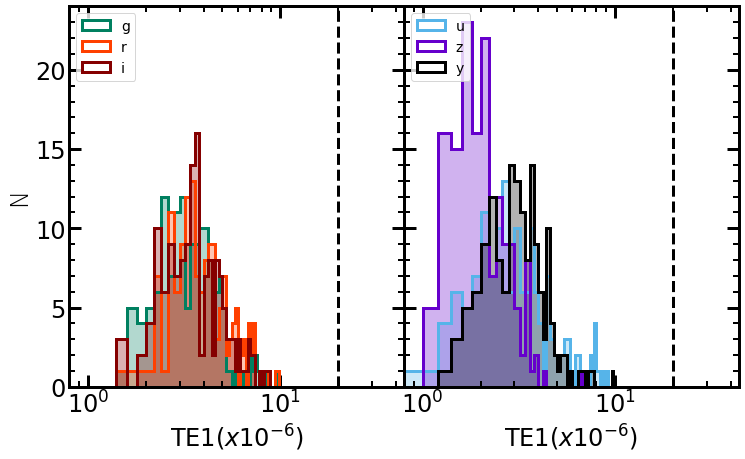

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7), sharex=False, sharey=True)
#fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

plt.subplot(1, 2, 1)

for band in bands_blue:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(te1_bands == band)
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(20.0, 0, 24, linewidth=3, linestyle='--', color='Black')
plt.legend(loc='upper left')
plt.ylim(0, 24)
plt.xlim(0.8, 44)
#plt.xlim(0, 22.3)
plt.xlabel(r'${\rm TE1} (x10^{-6})$')
plt.ylabel('N')
plt.minorticks_on()
plt.semilogx()

plt.subplot(1, 2, 2)

for band in bands_red:
    if band == 'y':
        colorband = 'Y'
    else:
        colorband = band
    sel = np.where(te1_bands == band)
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), alpha=0.3,
             linewidth=3, color=BAND_COLORS.get(colorband), label='__no label__')
    plt.hist(te1_measurements[sel]/1e-6, bins=np.arange(0, 10, 0.2), histtype='step',
             linewidth=3, color=BAND_COLORS.get(colorband), label=band)

plt.vlines(20.0, 0, 24, linewidth=3, linestyle='--', color='Black')
plt.legend(loc='upper left')
plt.xlim(0.8, 44)
#plt.xlim(0, 11.3)
plt.xlabel(r'${\rm TE1} (x10^{-6})$')
plt.minorticks_on()
plt.semilogx()

# plt.savefig('dp02_te1_alltracts_allbands_2panel.png', dpi=300)

plt.show()